In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import dbconfig
sns.set()

In [2]:
engine = create_engine(dbconfig.aws_connection_string)
table_names = engine.table_names()
print(table_names)

['partners', 'loan_dates', 'd_date', 'lenders', 'loans', 'loans_lenders', 'kiva_data_flat']


In [3]:
days = pd.read_sql_query("SELECT * FROM loan_dates", engine)
loans = pd.read_sql_query("SELECT * FROM loans", engine)
partners = pd.read_sql_query("SELECT * FROM partners", engine)

In [4]:
days.columns

Index(['loan_id', 'posted_time_actual', 'disburse_time_actual',
       'raised_time_actual', 'disburse_to_posted_days',
       'posted_to_raised_days', 'disbursed_to_raised_days'],
      dtype='object')

In [20]:
days.head()

,loan_id,posted_time_actual,disburse_time_actual,raised_time_actual,disburse_to_posted_days,posted_to_raised_days,disbursed_to_raised_days
0,441030,2012-06-21 07:42:19+00:00,2012-06-04 07:00:00+00:00,2012-06-23 01:36:24+00:00,17.0,1.0,18.0
1,442020,2012-06-22 07:02:18+00:00,2012-06-18 07:00:00+00:00,2012-06-26 06:48:54+00:00,4.0,3.0,7.0
2,1333356,2017-07-05 01:13:55+00:00,2017-06-23 07:00:00+00:00,2017-07-19 03:23:49+00:00,11.0,14.0,25.0
3,1317694,2017-06-11 07:33:52+00:00,2017-05-12 07:00:00+00:00,2017-07-16 07:43:47+00:00,30.0,35.0,65.0
4,1334422,2017-07-06 01:55:17+00:00,2017-06-27 07:00:00+00:00,2017-07-22 03:02:56+00:00,8.0,16.0,24.0


In [25]:
days.disburse_to_posted_days

0          17.0
1           4.0
2          11.0
3          30.0
4           8.0
5          12.0
6          24.0
7          26.0
8          20.0
9           8.0
10         12.0
11         23.0
12         28.0
13         19.0
14         29.0
15         15.0
16         10.0
17         26.0
18         31.0
19         28.0
20         16.0
21         12.0
22         27.0
23         13.0
24          0.0
25         28.0
26         28.0
27          4.0
28          4.0
29         29.0
           ... 
1419577    11.0
1419578    29.0
1419579    19.0
1419580   -11.0
1419581    16.0
1419582    15.0
1419583     1.0
1419584    13.0
1419585    11.0
1419586     0.0
1419587    17.0
1419588    17.0
1419589    11.0
1419590    14.0
1419591    11.0
1419592    25.0
1419593    25.0
1419594     8.0
1419595    29.0
1419596    25.0
1419597    25.0
1419598     9.0
1419599     5.0
1419600    27.0
1419601     5.0
1419602     1.0
1419603    16.0
1419604     5.0
1419605    13.0
1419606    19.0
Name: disburse_to_posted

In [26]:
days.disburse_to_posted_days.value_counts()

 29.0     77152
 28.0     64553
 27.0     62984
 6.0      54100
 0.0      53812
 5.0      48467
 7.0      47441
 26.0     46321
 13.0     46263
 12.0     42418
 30.0     41937
 4.0      40639
 20.0     39287
 14.0     38779
 11.0     37537
 8.0      36455
 3.0      36258
 19.0     35617
 1.0      35438
 25.0     35096
 10.0     35050
 21.0     34409
 2.0      34181
 9.0      32956
 18.0     31113
 24.0     30218
 15.0     29828
 17.0     28751
 16.0     28145
 22.0     27692
          ...  
-293.0        1
 82.0         1
-286.0        1
-287.0        1
-290.0        1
-254.0        1
 76.0         1
-427.0        1
-219.0        1
-338.0        1
 116.0        1
-307.0        1
-234.0        1
 117.0        1
-236.0        1
 89.0         1
-238.0        1
-404.0        1
-392.0        1
-243.0        1
 79.0         1
-245.0        1
 61.0         1
 75.0         1
-249.0        1
-418.0        1
-304.0        1
-340.0        1
-257.0        1
-406.0        1
Name: disburse_to_posted

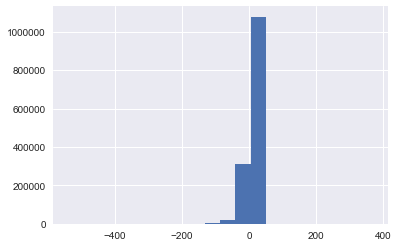

In [28]:
days.disburse_to_posted_days.hist(bins = 20)

In [39]:
days_adj = days.loc[days['disburse_to_posted_days'] >= 0]

In [40]:
days_adj.head()

,loan_id,posted_time_actual,disburse_time_actual,raised_time_actual,disburse_to_posted_days,posted_to_raised_days,disbursed_to_raised_days
0,441030,2012-06-21 07:42:19+00:00,2012-06-04 07:00:00+00:00,2012-06-23 01:36:24+00:00,17.0,1.0,18.0
1,442020,2012-06-22 07:02:18+00:00,2012-06-18 07:00:00+00:00,2012-06-26 06:48:54+00:00,4.0,3.0,7.0
2,1333356,2017-07-05 01:13:55+00:00,2017-06-23 07:00:00+00:00,2017-07-19 03:23:49+00:00,11.0,14.0,25.0
3,1317694,2017-06-11 07:33:52+00:00,2017-05-12 07:00:00+00:00,2017-07-16 07:43:47+00:00,30.0,35.0,65.0
4,1334422,2017-07-06 01:55:17+00:00,2017-06-27 07:00:00+00:00,2017-07-22 03:02:56+00:00,8.0,16.0,24.0


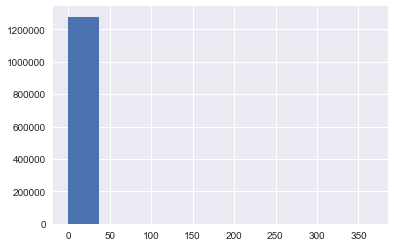

In [41]:
days_adj.disburse_to_posted_days.hist()

In [33]:
days_adj.disburse_to_posted_days

0          17.0
1           4.0
2          11.0
3          30.0
4           8.0
5          12.0
6          24.0
7          26.0
8          20.0
9           8.0
10         12.0
11         23.0
12         28.0
13         19.0
14         29.0
15         15.0
16         10.0
17         26.0
18         31.0
19         28.0
20         16.0
21         12.0
22         27.0
23         13.0
24          0.0
25         28.0
26         28.0
27          4.0
28          4.0
29         29.0
           ... 
1419576    14.0
1419577    11.0
1419578    29.0
1419579    19.0
1419581    16.0
1419582    15.0
1419583     1.0
1419584    13.0
1419585    11.0
1419586     0.0
1419587    17.0
1419588    17.0
1419589    11.0
1419590    14.0
1419591    11.0
1419592    25.0
1419593    25.0
1419594     8.0
1419595    29.0
1419596    25.0
1419597    25.0
1419598     9.0
1419599     5.0
1419600    27.0
1419601     5.0
1419602     1.0
1419603    16.0
1419604     5.0
1419605    13.0
1419606    19.0
Name: disburse_to_posted